# Shivam Chauhan Week 4 Assignment : KNN on Titanic Dataset

In [1]:
#loading the libraries 
import pandas as pd
import os
from matplotlib import pyplot as plt


#loading the files
os.getcwd()
os.chdir("C:/Users\Shivam\OneDrive - Northeastern University\STUDY\EAI 6000 - FAI\Week 1 - logistic")
os.getcwd()
df = pd.read_csv("test_data.csv")

In [2]:
#Removing the unique ID which are column 1 and 2. 
df.drop(df.columns[:2], axis=1, inplace = True)
df.head(5)

,Survived,Sex,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Family_size,Title_1,Title_2,Title_3,Title_4,Emb_1,Emb_2,Emb_3
0,0,1,0.2000,0.050749,0,1,0,0.0,1,0,0,0,0,0,1
1,0,0,0.3500,0.135753,0,0,1,1.0,0,0,0,1,0,0,1
2,0,1,0.3500,0.059914,1,0,0,0.0,1,0,0,0,1,0,0
3,0,1,0.3125,0.015412,0,0,1,0.0,1,0,0,0,0,0,1
4,0,1,0.4875,0.025374,0,1,0,0.0,1,0,0,0,0,0,1


In [3]:
#Creating arrays for train data and test data. Also removing the unique ID which are column 1 and 2. 
x = df.iloc[:,1:].values
y = df.iloc[:,0].values

In [4]:
#splitting the data into training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)


# KNN model with k=5

In [5]:
#importing  the KNN classifier and fitting it into training set
sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [7]:
#evaluating the k=5 KNN model 
from sklearn.metrics import accuracy_score
y_pred = classifier.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.85


In [12]:
#Building the confusion matrix for the k=5 KNN model
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test,y_pred)
conf_matrix

array([[14,  1],
       [ 2,  3]], dtype=int64)

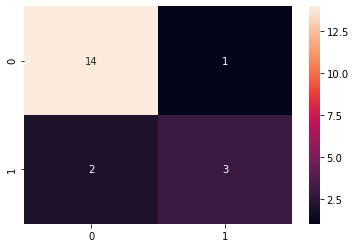

In [13]:
# visualizing the confusion matrics
import seaborn as sn
sn.heatmap(conf_matrix, annot=True)


### We can see when we select the K= 5 we are getting accuracy of 0.85. Now we will check if can increase the accuracy by selecting other K values. 

# Selecting the K value 

In [15]:
#checing the error rate for k value between 1 to 20
import numpy as np
error_rate = []

for i in range(1,20):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

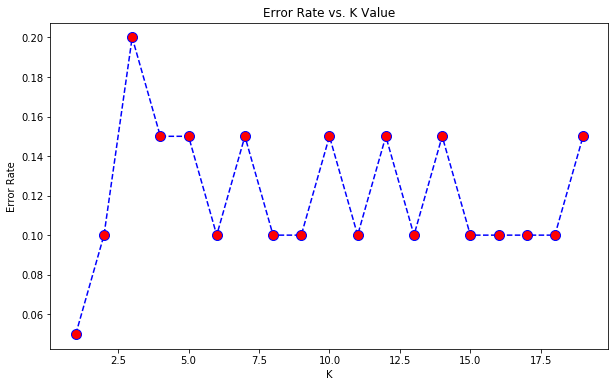

In [53]:
plt.figure(figsize=(10,6))
plt.plot(range(1,20),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')


### It is strange to see that selecting K as 1 is giving minimum error rate. Usually k=1 gives highest error rate. This may be because our data set is too small and we have tested a small data test set. Still we will check k= 1 and k=2 on this dataset. 

# KNN Model with k=1

In [35]:
classifier1 = KNeighborsClassifier(n_neighbors=1)
classifier1.fit(X_train, y_train)
y_pred1 = classifier1.predict(X_test)
KNN1= accuracy_score(y_test,y_pred1)
KNN1

0.95

In [45]:
conf_matrix1 = confusion_matrix(y_test,y_pred1)
conf_matrix1


array([[14,  1],
       [ 0,  5]], dtype=int64)

# KNN Model with K=2

In [20]:
classifier2 = KNeighborsClassifier(n_neighbors=2)
classifier2.fit(X_train, y_train)
y_pred2 = classifier2.predict(X_test)
print(accuracy_score(y_test,y_pred2))

0.9


### We can obserse that K=1 is giving the higest accuracy and K=2 is better than K=5. In this case we will selecting k=1 as the best KNN model because we have build our other models on same training set and tested on same test set. 

# Models Comparision

In [24]:
#logistic Regression
from sklearn.linear_model import LogisticRegression
log_m = LogisticRegression()
log_m.fit(X_train,y_train)
y_pred_lm = log_m.predict(X_test)
accuracy_lm = accuracy_score(y_test,y_pred_lm)
accuracy_lm

C:\Users\Shivam\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.85

In [33]:
#Decision Tree model
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion = 'entropy')
dtree.fit(X_train,y_train)
predictions = dtree.predict(X_test)
Dtree_acc= accuracy_score(y_test,predictions)
Dtree_acc

0.7

In [34]:
#Random Forest 
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)
rfc_acc = accuracy_score(y_test,rfc_pred)
rfc_acc

0.85

In [44]:
Models = {'Logistic Regression' : accuracy_lm , 'Decision Tree' : Dtree_acc , 'Random Forest' : rfc_acc , 'KNN' : KNN1}
df_m = pd.DataFrame.from_dict(Models, orient='index',columns=['Accuracy'])
df_m

,Accuracy
Logistic Regression,0.85
Decision Tree,0.70
Random Forest,0.85
KNN,0.95


### As we can see our best model is KNN with k=1 in this clase followed by Logistic Regression and Random Forest ( 100 trees). 